In [19]:
import os

from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd

In [20]:

load_dotenv()  

DB_URI = os.getenv("DB_URI")
engine = create_engine(DB_URI)


In [21]:
customers = pd.read_sql(
    "SELECT * FROM ecommerce.customer_profit;",
    engine
)
customers


,customer_unique_id,customer_revenue,customer_cost,customer_freight_value,customer_net_profit,customer_total_order
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,77.940,12.00,39.960,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,11.340,8.29,-0.730,1
2,0000f46a3911fa3c0805444483337064,69.00,41.400,17.22,10.380,1
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,15.594,17.63,-7.234,1
4,0004aac84e0df4da2b147fca70cf8255,180.00,108.000,16.89,55.110,1
...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,942.000,497.42,130.580,1
95416,fffea47cd6d3cc0a88bd621562a9d061,64.89,38.934,19.69,6.266,1
95417,ffff371b4d645b6ecea244b27531430a,89.90,53.940,22.56,13.400,1
95418,ffff5962728ec6157033ef9805bacc48,115.00,69.000,18.69,27.310,1


In [22]:
customers["freight_ratio"] = (
    customers["customer_freight_value"] / customers["customer_revenue"]
)


In [23]:
customers

,customer_unique_id,customer_revenue,customer_cost,customer_freight_value,customer_net_profit,customer_total_order,freight_ratio
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,77.940,12.00,39.960,1,0.092379
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,11.340,8.29,-0.730,1,0.438624
2,0000f46a3911fa3c0805444483337064,69.00,41.400,17.22,10.380,1,0.249565
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,15.594,17.63,-7.234,1,0.678338
4,0004aac84e0df4da2b147fca70cf8255,180.00,108.000,16.89,55.110,1,0.093833
...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,942.000,497.42,130.580,1,0.316828
95416,fffea47cd6d3cc0a88bd621562a9d061,64.89,38.934,19.69,6.266,1,0.303437
95417,ffff371b4d645b6ecea244b27531430a,89.90,53.940,22.56,13.400,1,0.250945
95418,ffff5962728ec6157033ef9805bacc48,115.00,69.000,18.69,27.310,1,0.162522


In [24]:
def segment_customer(row):
    if row["customer_net_profit"] < 0 :
        return "Loss-making"
    elif row["freight_ratio"] > 0.20:
        return "Borderline"
    else:
        return "Profitable"

customers["customer_segment"] = customers.apply(
    segment_customer, axis=1
)
customers

,customer_unique_id,customer_revenue,customer_cost,customer_freight_value,customer_net_profit,customer_total_order,freight_ratio,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,77.940,12.00,39.960,1,0.092379,Profitable
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,11.340,8.29,-0.730,1,0.438624,Loss-making
2,0000f46a3911fa3c0805444483337064,69.00,41.400,17.22,10.380,1,0.249565,Borderline
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,15.594,17.63,-7.234,1,0.678338,Loss-making
4,0004aac84e0df4da2b147fca70cf8255,180.00,108.000,16.89,55.110,1,0.093833,Profitable
...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,942.000,497.42,130.580,1,0.316828,Borderline
95416,fffea47cd6d3cc0a88bd621562a9d061,64.89,38.934,19.69,6.266,1,0.303437,Borderline
95417,ffff371b4d645b6ecea244b27531430a,89.90,53.940,22.56,13.400,1,0.250945,Borderline
95418,ffff5962728ec6157033ef9805bacc48,115.00,69.000,18.69,27.310,1,0.162522,Profitable


In [25]:
customers["customer_segment"].value_counts()


customer_segment
Profitable     42694
Borderline     31113
Loss-making    21613
Name: count, dtype: int64

In [26]:
customers["customer_segment"].value_counts(normalize=True) * 100


customer_segment
Profitable     44.743240
Borderline     32.606372
Loss-making    22.650388
Name: proportion, dtype: float64

In [27]:
customers[customers["customer_segment"] == "Loss-making"].head(10)


,customer_unique_id,customer_revenue,customer_cost,customer_freight_value,customer_net_profit,customer_total_order,freight_ratio,customer_segment
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,11.340,8.29,-0.730,1,0.438624,Loss-making
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,15.594,17.63,-7.234,1,0.678338,Loss-making
10,0006fdc98a402fceb4eb0ee528f6a8d4,13.90,8.340,15.10,-9.540,1,1.086331,Loss-making
11,00082cbe03e478190aadbea78542e933,79.00,47.400,47.26,-15.660,1,0.598228,Loss-making
16,000c8bdb58a29e7115cfc257230fb21b,13.90,8.340,15.10,-9.540,1,1.086331,Loss-making
20,000ec5bff359e1c0ad76a81a45cb598f,14.96,8.976,12.79,-6.806,1,0.854947,Loss-making
21,000ed48ceeb6f4bf8ad021a10a3c7b43,12.88,7.728,7.87,-2.718,1,0.611025,Loss-making
33,00172711b30d52eea8b313a7f2cced02,74.50,44.700,47.57,-17.770,1,0.638523,Loss-making
35,001926cef41060fae572e2e7b30bd2a4,48.79,29.274,42.42,-22.904,1,0.869440,Loss-making
37,00196c4c9a3af7dd2ad10eade69c926f,22.32,13.392,15.26,-6.332,1,0.683692,Loss-making


In [28]:
customers[customers["customer_segment"] == "Profitable"].head(10)


,customer_unique_id,customer_revenue,customer_cost,customer_freight_value,customer_net_profit,customer_total_order,freight_ratio,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,77.940,12.00,39.960,1,0.092379,Profitable
4,0004aac84e0df4da2b147fca70cf8255,180.00,108.000,16.89,55.110,1,0.093833,Profitable
5,0004bd2a26a76fe21f786e4fbd80607f,154.00,92.400,12.98,48.620,1,0.084286,Profitable
7,00053a61a98854899e70ed204dd4bafe,382.00,229.200,37.18,115.620,1,0.097330,Profitable
8,0005e1862207bf6ccc02e4228effd9a0,135.00,81.000,15.12,38.880,1,0.112000,Profitable
14,000a5ad9c4601d2bbdd9ed765d5213b3,76.99,46.194,14.29,16.506,1,0.185609,Profitable
18,000de6019bb59f34c099a907c151d855,229.80,137.880,27.64,64.280,1,0.120279,Profitable
23,0010a452c6d13139e50b57f19f52e04e,299.00,179.400,26.93,92.670,1,0.090067,Profitable
27,0011805441c0d1b68b48002f1d005526,269.00,161.400,28.14,79.460,1,0.104610,Profitable
28,0011857aff0e5871ce5eb429f21cdaf5,174.33,104.598,18.50,51.232,1,0.106121,Profitable


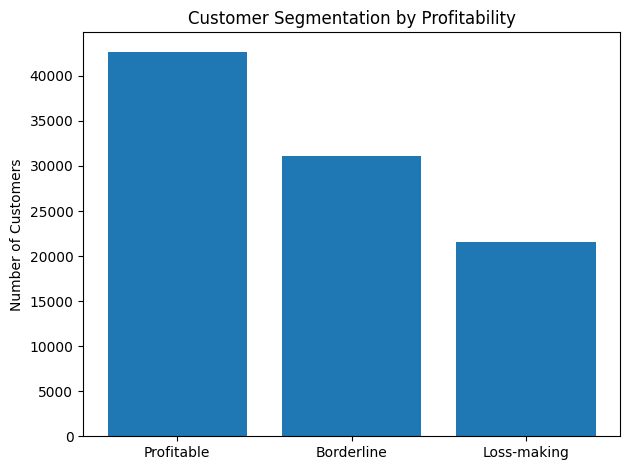

In [29]:
import matplotlib.pyplot as plt

segment_counts = customers["customer_segment"].value_counts()

plt.figure()
plt.bar(segment_counts.index, segment_counts.values)
plt.title("Customer Segmentation by Profitability")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()
